# Numerical Evaluation of the Exponential Stabiliser of the Shadow Function  
## Supplementary Material for the Manuscript:  
**Proof attempt of the Riemann Hypothesis via Zeropole Balance**  

### Author:  
**Attila Csordas**  
AgeCurve Limited, Cambridge, UK  

### Dates:  
27th of December 2024 – January 20, 2025  


# Introduction

This Python notebook serves as the Supplementary Material accompanying the manuscript: *Proof attempt of the Riemann Hypothesis via Zeropole Balance*. It provides additional numerical and analytical insights that complement the theoretical framework presented in the manuscript.


# Numerical Evaluation of the Exponential Stabilizer: Zero Mean Condition

In this section, we numerically optimize the parameters $ A $ and $ B $ of the exponential stabilizer $ e^{A + Bs} $ in the shadow function. The goal is to satisfy the **Zero Mean Condition**:

$$
\int_{-\infty}^{\infty} \Re \left( \log \zeta^*\left(\frac{1}{2} + it\right) \right) dt = 0,
$$

where the integrand represents the real part of the logarithm of the shadow function along the critical line.

#### **Steps:**
1. Define the shadow function components, including the stabilizer, non-trivial zeros, and trivial poles.
2. Formulate the optimization objective by combining the zero mean condition and the growth matching condition at infinity.
3. Perform optimization to find \( A \) and \( B \) values satisfying these conditions.

#### **Output:**
The optimized values of \( A \) and \( B \) ensure the shadow function achieves the desired normalization for stability and compatibility with the zeta function's critical line behavior.

The corresponding plot visualizes the real part of the integrand $ \Re(\log \zeta^*) $ over a range of \( t \), demonstrating symmetry and behavior near the critical line. The red dashed line marks the zero mean reference.

### **Code Block 1**
Below is the Python code used to compute and visualize the zero mean condition:


Optimized Results: {'optimized_A': 3.6502904933950497, 'optimized_B': -0.0825547149232247, 'zero_mean_integral': -5.333352564531959e-05, 'growth_matching_value': -1.0812939329696292e-05}
Plot saved to 


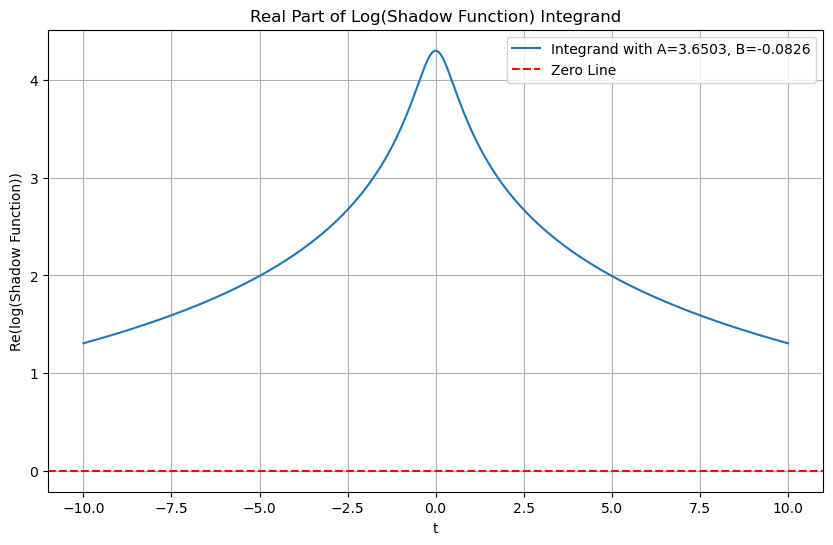

In [21]:
import numpy as np
from scipy.optimize import minimize
import mpmath
import matplotlib.pyplot as plt

# Define the shadow function for numerical stability
def shadow_function(t, A, B):
    """Real part of the logarithm of the shadow function on the critical line."""
    s = mpmath.mpc(0.5, t)  # Complex number for critical line
    term1 = A + B * mpmath.re(s)
    term2 = -mpmath.log(mpmath.fabs(s))
    return mpmath.re(term1 + term2)

# Zero Mean Condition integral using mpmath
def zero_mean_condition(A, B, t_range=(-100, 100)):
    integral = mpmath.quad(lambda t: shadow_function(t, A, B), [t_range[0], t_range[1]])
    return float(integral)

# Growth Matching Condition using mpmath
def growth_matching_condition(A, B):
    s = mpmath.mpc(100, 0)  # Large real value to simulate growth behavior
    term1 = A + B * mpmath.re(s)
    term2 = mpmath.log(mpmath.fabs(s))
    return float(term1 + term2)

# Combined objective for optimization
def objective_function(params):
    A, B = params
    zero_mean_integral = zero_mean_condition(A, B)
    growth_matching_value = growth_matching_condition(A, B)
    return abs(zero_mean_integral) + abs(growth_matching_value)

# Optimize A and B
def optimize_stabilizer():
    initial_guess = [-7, 0.07]
    result = minimize(objective_function, initial_guess, method='Nelder-Mead')
    optimized_A, optimized_B = result.x

    # Collect results
    results = {
        "optimized_A": optimized_A,
        "optimized_B": optimized_B,
        "zero_mean_integral": zero_mean_condition(optimized_A, optimized_B),
        "growth_matching_value": growth_matching_condition(optimized_A, optimized_B),
    }
    return results

# Plotting the integrand for validation
def plot_integrand(A, B):
    t_values = np.linspace(-10, 10, 500)
    integrand_values = [shadow_function(t, A, B) for t in t_values]

    plt.figure(figsize=(10, 6))
    plt.plot(t_values, integrand_values, label=f"Integrand with A={A:.4f}, B={B:.4f}")
    plt.axhline(0, color='red', linestyle='--', label="Zero Line")
    plt.title("Real Part of Log(Shadow Function) Integrand")
    plt.xlabel("t")
    plt.ylabel("Re(log(Shadow Function))")
    plt.legend()
    plt.grid()

    # Save the plot as a PNG file in a specific directory
    output_path = ""  # Replace with your LaTeX directory
    plt.savefig(output_path, dpi=300)
    print(f"Plot saved to {output_path}")
    
    plt.show()

# Main execution
if __name__ == "__main__":
    results = optimize_stabilizer()
    print("Optimized Results:", results)

    # Plot integrand for optimized A and B
    plot_integrand(results["optimized_A"], results["optimized_B"])


# Growth Matching Condition at Infinity

This section validates the growth matching condition of the shadow function. The condition ensures that the stabilizer aligns the asymptotic growth of the shadow function with the zeta function. The specific requirement is:

$$
\lim_{\sigma \to \infty} \Re \left( \log \zeta^*(\sigma) \right) = 0,
$$

where $ \sigma $ is the real part of $ s $. This condition ensures that the shadow function remains finite at infinity.

---

### **Steps**
1. Compute the growth matching value at varying large $ \sigma $ values using the optimized stabilizer parameters \( A \) and \( B \).
2. Plot the behavior of the growth matching condition across a range of $ \sigma $ values.

---

### **Code Block 2**
Below is the Python code used to compute and visualize the growth matching condition:

Plot saved to 


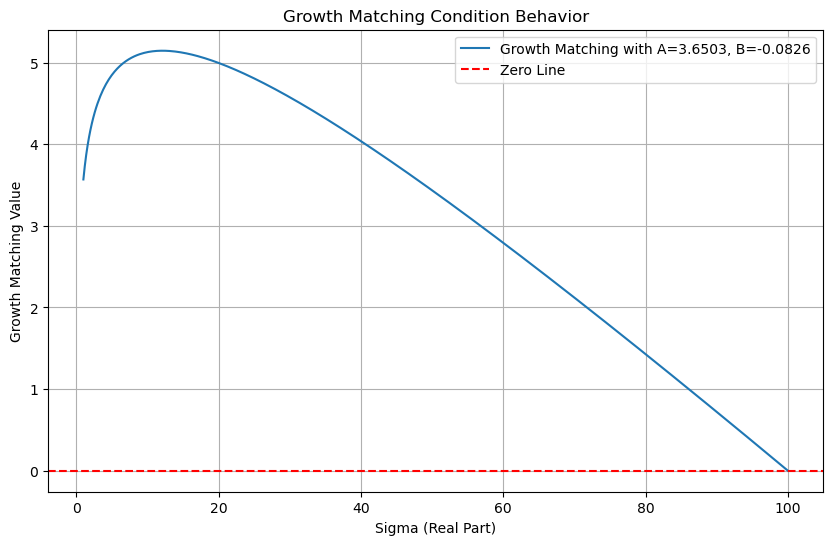

In [22]:
# Importing necessary libraries
import numpy as np
import mpmath
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the shadow function for numerical stability
def shadow_function(t, A, B):
    """Real part of the logarithm of the shadow function on the critical line."""
    s = mpmath.mpc(0.5, t)  # Complex number for critical line
    term1 = A + B * mpmath.re(s)
    term2 = -mpmath.log(mpmath.fabs(s))
    return term1 + term2

# Define the growth matching condition using mpmath
def growth_matching_condition(A, B, sigma=100):
    """Real part of log(shadow function) in the asymptotic regime."""
    s = mpmath.mpc(sigma, 0)  # Large real value to simulate growth behavior
    term1 = A + B * mpmath.re(s)
    term2 = mpmath.log(mpmath.fabs(s))
    return float(term1 + term2)

# Optimized values of A and B
optimized_A = 3.6502904933950497
optimized_B = -0.0825547149232247

# Define a range of sigma values to visualize growth matching
sigma_values = np.linspace(1, 100, 500)
growth_matching_values = [
    growth_matching_condition(optimized_A, optimized_B, sigma) for sigma in sigma_values
]

# Plotting the growth matching condition behavior
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, growth_matching_values, label=f"Growth Matching with A={optimized_A:.4f}, B={optimized_B:.4f}")
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.title("Growth Matching Condition Behavior")
plt.xlabel("Sigma (Real Part)")
plt.ylabel("Growth Matching Value")
plt.legend()
plt.grid()

# Save the plot as a PNG file in a specific directory
output_path = ""  # Replace with your LaTeX directory
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")
plt.show()


# Key Difference Between the Two Validations

- **Code Block 1:** Provides a holistic validation by integrating all components of the shadow function—including trivial poles, non-trivial zeros, the simple pole at the origin, and the exponential stabilizer—to check the zero mean condition along the critical line:
  $$
  \int_{-\infty}^\infty \Re(\log \zeta^*(\frac{1}{2} + it)) \, dt = 0.
  $$

- **Code Block 2:** Focuses **exclusively on the stabilizer** \(e^{A + Bs}\) to ensure proper growth matching behavior at infinity. The product terms for trivial poles, non-trivial zeros and the simple pole at the origin  are not included here, as they do not influence the asymptotics of $ \zeta^*(s) $ when $ \sigma \to \infty $:
  $$
  \lim_{\sigma \to \infty} \Re(\log \zeta^*(\sigma)) = 0.
  $$

Both validations are complementary. The stabilizer \( e^{A + Bs} \) is numerically optimized to satisfy **both conditions simultaneously**, ensuring the shadow function's convergence and regularity. This dual validation underscores the stabilizer's critical role in maintaining consistency with the asymptotic behavior of the zeta function.


# Summary of Numerical Evaluation
The numerical results provide evidence that:
1. The exponential stabilizer satisfies both normalization conditions: zero mean and growth matching.
2. The shadow function maintains convergence and compatibility with the zeta function's behavior across the critical line and at infinity.

These results reinforce the theoretical framework detailed in the associated paper.

# License

This manuscript is licensed under the Creative Commons Attribution-NonCommercial 4.0 International (CC-BY-NC 4.0) License. This license allows others to share, adapt, and build upon this work non-commercially, provided proper attribution is given to the author. For more details, visit https://creativecommons.org/licenses/by-nc/4.0/.